In [1]:
from numpy import *

In [2]:
fname = lambda x, y: y

In [3]:
y0 = 1
b  = 10.
h  = 1e-1

In [4]:
def euler(fname,y0,b,h):
    t = arange(0,b,h)
    y = zeros(len(t))
    y[0] = y0
    for i in range(len(y)-1):
        y[i+1] = y[i] + h*fname(t[i],y[i])
    return asarray([t,y])

In [5]:
myres = euler(fname,y0,b,h)

In [6]:
import matplotlib.pyplot as plt

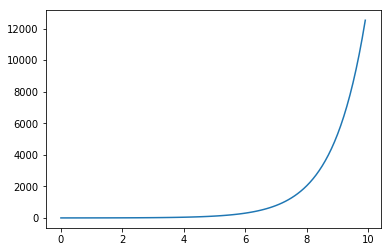

In [7]:
plt.plot(myres[0],myres[1])

In [8]:
import matplotlib.animation as animation

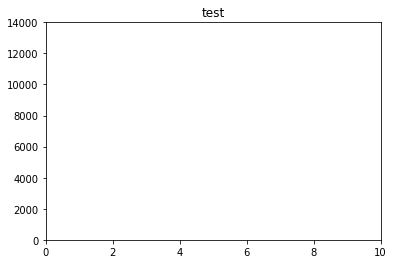

In [9]:
def update_line(num, myres, line):
    line.set_data(myres[..., 0:num])
    return line,

fig = plt.figure()

l, = plt.plot([], [], 'ro')
plt.xlim(0, 10)
plt.ylim(0, 14000)
plt.title('test')
line_ani = animation.FuncAnimation(fig, update_line, 100, fargs=(myres, l), interval=50, blit=True)

In [10]:
line_ani.save('funcion_continua.mp4')

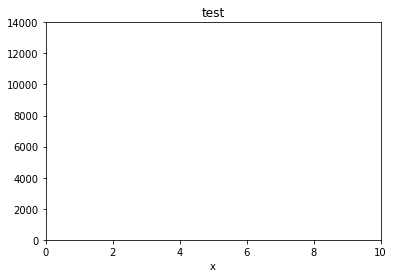

In [11]:
def update_line(num, myres, line):
    line.set_data(myres[..., num-1:num])
    return line,

fig = plt.figure()

l, = plt.plot([], [], 'ro')
plt.xlim(0, 10)
plt.ylim(0, 14000)
plt.xlabel('x')
plt.title('test')
line_ani = animation.FuncAnimation(fig, update_line, 100, fargs=(myres, l), interval=50, blit=True)

In [12]:
line_ani.save('particula_en_movimiento.mp4')

In [13]:
from IPython.display import HTML
HTML(line_ani.to_html5_video())

In [14]:
Nsphere = 10
G = 6.67259*(10**(-11))
h = 5000
b = 10000000

In [15]:
M = zeros((Nsphere,1))
M[0] = 1.9889e+30  # Masa Sol
M[1] = 0.33*(10**24)# Masa Mercurio
M[2] = 4.87*(10**24)# Masa Venus
M[3] = 5.97*(10**24)# Masa Tierra
M[4] = 0.642*(10**24)# Masa Marte
M[5] = 1899*(10**24)# Masa Jupiter
M[6] = 568*(10**24)# Masa Saturno
M[7] = 86.8*(10**24)# Masa Urano
M[8] = 102*(10**24)# Masa Neptuno
M[9] = 0.0125*(10**24)# Masa Pluton

In [16]:
r = zeros((Nsphere,2))
r[0,:] = [0, 0]            # Sol
r[1,:] = [57.9*(10**9), 0]   # Mercurio
r[2,:] = [108.2*(10**9), 0]  # Venus
r[3,:] = [149.6*(10**9), 0]  # Tierra
r[4,:] = [227.9*(10**9), 0]  # Marte
r[5,:] = [778.6*(10**9), 0]  # Jupiter
r[6,:] = [1433.5*(10**9), 0] # Saturno
r[7,:] = [2872.5*(10**9), 0] # Urano
r[8,:] = [4495.1*(10**9), 0] # Neptuno
r[9,:] = [5870.0*(10**9), 0] # Pluton

In [17]:
v = zeros((Nsphere,2));
v[0,:] = [0, 0]
v[1,:] = [0, 47.89*(10**3)]
v[2,:] = [0, 35.03*(10**3)]
v[3,:] = [0, 29.79*(10**3)]
v[4,:] = [0, 24.13*(10**3)]
v[5,:] = [0, 13.06*(10**3)]
v[6,:] = [0, 9.64*(10**3)]
v[7,:] = [0, 6.80*(10**3)]
v[8,:] = [0, 5.40*(10**3)]
v[9,:] = [0, 4.70*(10**3)]

In [18]:
fk = lambda r: r / ((linalg.norm(r))**3)

In [19]:
def fNB(r,M,k,Nsphere):
    a = zeros((Nsphere,2))
    for p in range(Nsphere):
        for n in range(Nsphere):
            if (n != p):
                a[p,:] += M[n]*k(r[n,:]-r[p,:])
    return a

In [20]:
fname = lambda r,M,k,Nsphere: fNB(r,M,k,Nsphere)

In [21]:
from pdb import *

In [22]:
def euler_fNB(fNB,h,G,b,v0,r0,M,fk,Nsphere):
    R = zeros((Nsphere,2,int(b/h)))
    vt = v0
    rt = r0
    i = 0
    tt = arange(0,b,h)
    for t in tt:
        #set_trace()
        a = fNB(rt,M,fk,Nsphere)
        v = vt + h*G*a
        r = rt + h*vt
        vt = v
        rt = r
        R[:,:,i] = rt
        i = i+1
    return R

In [23]:
R = euler_fNB(fname,h,G,b,v,r,M,fk,Nsphere)

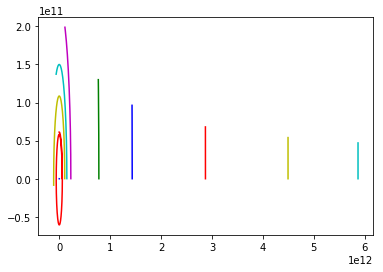

In [25]:
plt.plot(
    R[0,0,:],R[0,1,:],'-b', 
    R[1,0,:],R[1,1,:],'-r',
    R[2,0,:],R[2,1,:],'-y',
    R[3,0,:],R[3,1,:],'-c',
    R[4,0,:],R[4,1,:],'-m',
    R[5,0,:],R[5,1,:],'-g',
    R[6,0,:],R[6,1,:],'-b',
    R[7,0,:],R[7,1,:],'-r',
    R[8,0,:],R[8,1,:],'-y',
    R[9,0,:],R[9,1,:],'-c'
)

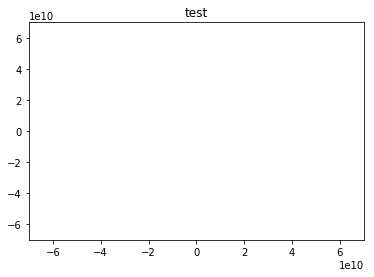

In [26]:
myres = R[1,:,:]

def update_line(num, myres, line):
    line.set_data(myres[..., num-1:num])
    return line,

fig = plt.figure()

l, = plt.plot([], [], 'ro')
plt.xlim(-7*1e10, 7*1e10)
plt.ylim(-7*1e10, 7*1e10)
plt.title('test')
line_ani = animation.FuncAnimation(fig, update_line, 1590, fargs=(myres, l), interval=5, blit=True)

In [27]:
line_ani.save('relaicon_continua_R1.mp4')

In [28]:
from IPython.display import HTML
HTML(line_ani.to_html5_video())

In [29]:
from matplotlib.pylab import *

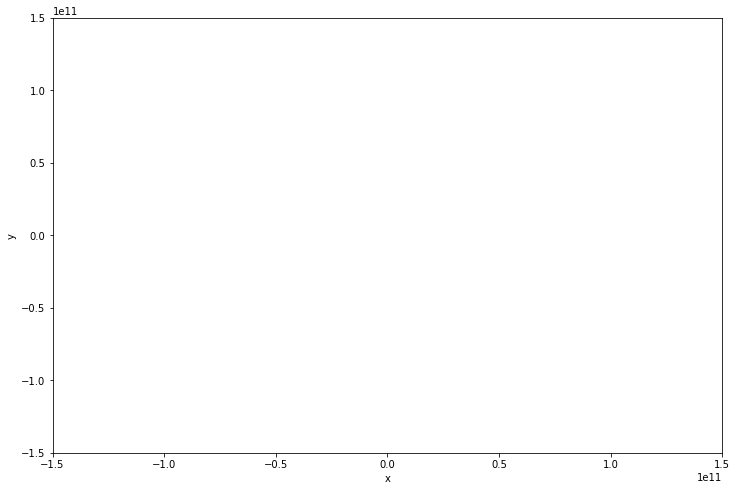

In [30]:
f = figure(num = 0, figsize = (12, 8))

ax01 = subplot2grid((2, 2),(0, 0), colspan = 2, rowspan = 2)
ax01.set_ylim(-15*1e10, 15*1e10)
ax01.set_xlim(-15*1e10, 15*1e10)
ax01.set_xlabel("x")
ax01.set_ylabel("y")

res1 = R[1,:,:]
res2 = R[2,:,:]

p011, = ax01.plot([], [], 'ob')
p012, = ax01.plot([], [], 'og')

def updateData(num, res1, p1, res2, p2):
    p1.set_data(res1[...,num-1:num])
    p2.set_data(res2[...,num-1:num])

    return p1, p2

line_ani = animation.FuncAnimation(f, updateData, 1000, fargs=(res1, p011, res2, p012), interval=5, blit=True)

In [31]:
line_ani.save('relacion_continua_R0-2.mp4')

In [32]:
from IPython.display import HTML
HTML(line_ani.to_html5_video())

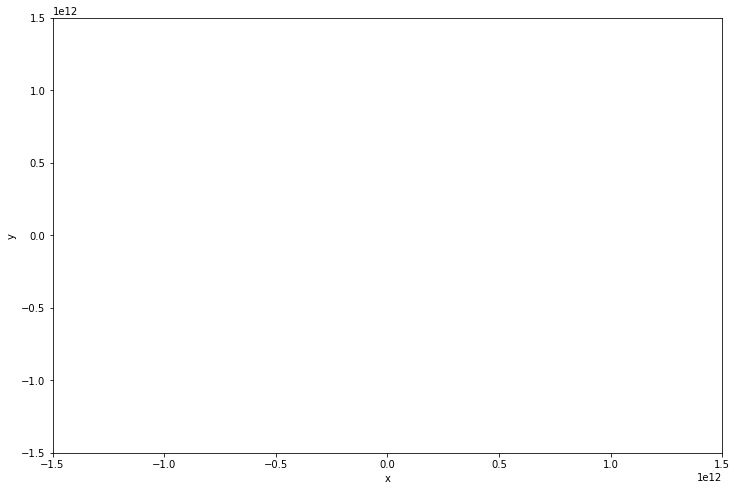

In [33]:
f = figure(num = 0, figsize = (12, 8))

ax01 = subplot2grid((2, 2),(0, 0), colspan = 2, rowspan = 2)
ax01.set_ylim(-15*1e11, 15*1e11)
ax01.set_xlim(-15*1e11, 15*1e11)
ax01.set_xlabel("x")
ax01.set_ylabel("y")

res0 = R[0,:,:]
res1 = R[1,:,:]
res2 = R[2,:,:]
res3 = R[3,:,:]
res4 = R[4,:,:]
res5 = R[5,:,:]
res6 = R[6,:,:]
res7 = R[7,:,:]
res8 = R[8,:,:]
res9 = R[9,:,:]

p0, = ax01.plot([], [], '-w')
p1, = ax01.plot([], [], '-g')
p2, = ax01.plot([], [], '-c')
p3, = ax01.plot([], [], '-b')
p4, = ax01.plot([], [], '-r')
p5, = ax01.plot([], [], '-k')
p6, = ax01.plot([], [], '-g')
p7, = ax01.plot([], [], '-c')
p8, = ax01.plot([], [], '-b')
p9, = ax01.plot([], [], '-r')

def updateData(num, 
               res0, p0, res1, p1, res2, p2, res3, p3, res4, p4, res5, p5, res6, p6, res7, p7, res8, p8, res9, p9):
    p0.set_data(res0[...,0:num])
    p1.set_data(res1[...,0:num])
    p2.set_data(res2[...,0:num])
    p3.set_data(res3[...,0:num])
    p4.set_data(res4[...,0:num])
    p5.set_data(res5[...,0:num])
    p6.set_data(res6[...,0:num])
    p7.set_data(res7[...,0:num])
    p8.set_data(res8[...,0:num])
    p9.set_data(res9[...,0:num])
    return p0, p1, p2, p3, p4, p5, p6, p7, p8, p9

line_ani = animation.FuncAnimation(f, updateData, 2000, 
        fargs=(res0, p0, res1, p1, res2, p2, res3, p3, res4, p4, res5, p5, res6, p6, res7, p7, res8, p8, res9, p9),
        interval=5, blit=True)

In [34]:
line_ani.save('relacion_continua_R0-9.mp4')

In [35]:
from IPython.display import HTML
HTML(line_ani.to_html5_video())